In [37]:
# import matplotlib
# matplotlib.use('TkAgg')
import numpy as np
import math as m
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from functools import reduce
import csv
%matplotlib inline
from utils import *

In [38]:
# %matplotlib inline
# r=1.01;
# K=2000.;
# params=(r,K);
# r,K=params
# # print(r)
# N0=100;

# def Ndot(N,t,params):
#     r,K=params
#     dN=r*N*(1.0-N/K);
#     return dN;


def fNdot(N,t,params):
#     tr=T, r0=r0;
    (s,i,r)=N;
    T,r0=params;
    ds=0.      -r0*s*i/T;
    di=r0*s*i/T-i/T;
    dr=i/T;
    return (ds,di,dr)
def Ndot(N,t,params):
    (S,I,R)=N;
    ki,kr=params;
    dS= 0.   -ki*S*I;
    dI=ki*S*I-kr*I;
    dR=kr*I  -0.;
    return (dS,dI,dR)

def vfield(axis,Ndot,num=20,scale=1/0.0015,norm_method='none',col=None):
    xlim=list(axis.get_xlim());
    ylim=list(axis.get_ylim());
    x=np.linspace(xlim[0],xlim[1],num);
    y=np.linspace(ylim[0],ylim[1],num);
    xs,ys=np.meshgrid(x,y);
    us,vs=Ndot(xs,ys);
    
    ls=(us**2+vs**2)**0.5;        
    if norm_method=='log':
        lls=np.min(np.log(ls),0);
        us=us/ls*lls;
        vs=vs/ls*lls;
    elif norm_method=='len':
        ls=(us**2+vs**2)**0.5;
        us=us/ls;
        vs=vs/ls;
    axis.quiver(xs,ys,us,vs,color=col,scale_units='inches',angles='xy',pivot='mid',scale=scale)




In [185]:
params=(0.00016,0.2);
N0=[(9990,10,0),('S','I','R')];

class intobj():
    def __init__(self,Ndot,N0,params):
        self.fcn=Ndot;
        self.ss,self.labels=N0;
        self.params=params;
    def evo(self,ts):
        self.ts=ts;
        Ns=odeint(self.fcn,self.ss,ts,args=(self.params,));
        self.Ns=Ns;
        return(Ns)
    def line(self,ax,idx):
        ax.plot(self.ts,self.Ns[:,idx],label=self.labels[idx]);
    def phase(self,ax,idx):
        xi,yi=idx;
        ax.plot(self.Ns[:,xi],self.Ns[:,yi]);
        ax.set_xlabel(self.labels[xi]);
        ax.set_ylabel(self.labels[yi]);
        


from scipy.interpolate import *

def readcsv(fname):
#     fname='measles_data.csv'
    csvdata={};

    with open(fname,'r') as  f:
        header=f.readline().rstrip('\n').split(',');
        lsts=[[]]*(len(header));
        for line in f.readlines():
            data=line.rstrip('\n').split(',');
            for i,k in enumerate(data):
    #             len(lsts)
                lsts[i]=lsts[i]+[float(k)];
    #     print(lsts)
        for i,lst in enumerate(lsts):
            csvdata[header[i]]=lst;
    #     print(len(lsts))
    return csvdata;
csvdata=readcsv('measles_data.csv')
time_years=csvdata['time'];
time_days=[round(x*365) for x in csvdata['time']];
# print(time)
# len(set(time))
# len(time)
Is=csvdata['infection'];


fname='ukpop_short.csv'
popcsv=readcsv(fname);
pop_pre=popcsv['pop'];
f=interp1d(list(x + 0.5 for x in popcsv['year']),pop_pre);
pop=f(time_years);


        

34.325
[(6151.893222393971, 6.4500000000000002)]
0.615805127367


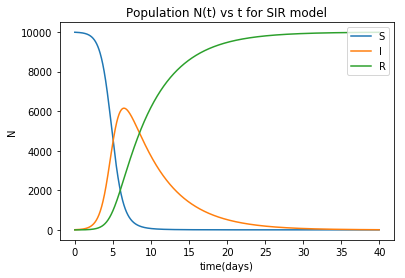

In [40]:
plt.close("all");
fig1=plt.figure();
ax=plt.subplot(1,1,1)
for i in range(3):
    s1.line(ax,i)
ax.set_xlabel('time(days)')
ax.set_ylabel('N')
ax.set_title('Population N(t) vs t for SIR model')
ax.legend();
ax.legend(loc=1)
fig1.savefig('task1_q5.png')

dur=min([t for x,t in zip(s1.Ns[:,1],s1.ts) if t>10 and x<30]);
print(dur)
s1.ss[0]-s1.Ns[-1,0]
peak=list([(x,t) for x,t in zip(s1.Ns[:,1],s1.ts) if x==max(s1.Ns[:,1])]);
print(peak)
print(peak[0][0]/9990)


# ax.plot(ts,intobj.Ns[:,0],label='S')
# ax.plot(intobj.Ns[:,1],label='I')
# ax.plot(intobj.Ns[:,2],label='R')
# t_max=20;
# num_tsteps=1001
# ts=np.linspace(0,t_max,num_tsteps);
# Ns=odeint(Ndot,N0,ts,args=(params,))

# ax.plot(ts,Ns,'-',label='N(t)')
# vfield(ax,Ndot,20,1/0.0015);

    
# fig1.show()
# help(type(fig1))

('total infection is ', 1279.5773136737128)


{'Ns': array([[  1.99000000e+03,   1.00000000e+01,   8.00000000e+03],
        [  1.98967973e+03,   1.01190780e+01,   8.00020119e+03],
        [  1.98935571e+03,   1.02395208e+01,   8.00040477e+03],
        ..., 
        [  7.10469469e+02,   2.07560403e+00,   9.28745493e+03],
        [  7.10445976e+02,   2.05776313e+00,   9.28749626e+03],
        [  7.10422686e+02,   2.04007481e+00,   9.28753724e+03]]),
 'fcn': <function __main__.Ndot>,
 'labels': ('S', 'I', 'R'),
 'params': (0.00016, 0.2),
 'ss': (1990, 10, 8000),
 'ts': array([   0. ,    0.1,    0.2, ...,   99.8,   99.9,  100. ])}

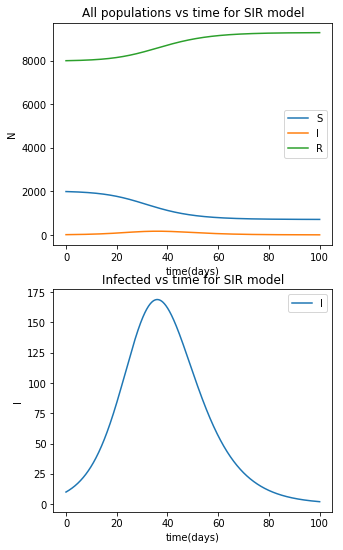

In [41]:

s1.ss=(1990,10,8000);
s1.evo(np.linspace(0,100,1001));
fig2=plt.figure(figsize=[5,9])
ax=plt.subplot(2,1,1)
for i in range(3):
    s1.line(ax,i);
ax.legend()
ax.set_xlabel('time(days)')
ax.set_ylabel('N')
ax.set_title('All populations vs time for SIR model')
ax.legend();

ax2=plt.subplot(2,1,2)
s1.line(ax2,1);
ax2.set_xlabel('time(days)')
ax2.set_ylabel('I')
ax2.set_title('Infected vs time for SIR model')
ax2.legend();
ax2.legend(loc=1)
fig2.savefig('task1_q7.png')
print('total infection is ',s1.ss[0]-s1.Ns[-1,0])
s1.__dict__
    
    

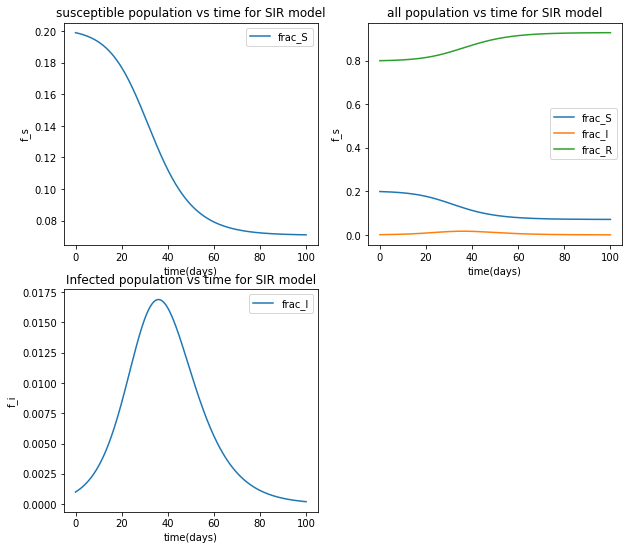

In [42]:

def fNdot(N,t,params):
#     tr=T, r0=r0;
    (s,i,r)=N;
    T,r0=params;
    ds=0.      -r0*s*i/T;
    di=r0*s*i/T-i/T;
    dr=i/T;
    return (ds,di,dr)
params=(5.,8.0);
a=.2;
b=.001
N0=[(.199,0.001,0.800),('frac_S','frac_I','frac_R')];
s1=intobj(fNdot,N0,params);
s1.evo(np.linspace(0,100,1001));
fig2=plt.figure(figsize=[10,9])

ax=plt.subplot(2,2,2)
for i in range(3):
    s1.line(ax,i);
ax.legend()
ax.set_xlabel('time(days)')
ax.set_ylabel('f_s')
ax.set_title('all population vs time for SIR model')
ax.legend();

ax=plt.subplot(2,2,1)
for i in range(1):
    s1.line(ax,i);
ax.legend()
ax.set_xlabel('time(days)')
ax.set_ylabel('f_s')
ax.set_title('susceptible population vs time for SIR model')
ax.legend();

ax2=plt.subplot(2,2,3)
s1.line(ax2,1);
ax2.set_xlabel('time(days)')
ax2.set_ylabel('f_i')
ax2.set_title('Infected population vs time for SIR model')
ax2.legend();
ax2.legend(loc=1)
fig2.savefig('task2_q4.png')

In [178]:
import utils
from scipy.integrate import odeint
import copy
# from utils import *
%matplotlib inline

fss=[0.01,0.05,0.10,0.20,0.30];
fi=0.0001;
siz=len(fss);
def fNdot(N,t,params):
#     tr=T, r0=r0;
    (s,i,r)=N;
    T,r0,k=params;
    ds=0.      -r0*s*i/T+k;
    di=r0*s*i/T-i/T;
    dr=i/T-k;
    return (ds,di,dr)
# fig2=plt.figure(figsize=[5,25]);
# ax2=plt.subplot(siz,1,i+1);

params=(8.0, 16.0, 0.0000);
N0=[(.199,fi,0.800),('frac_S','frac_I','frac_R','time/days')];
s0=intobj(fNdot,N0,params);
runs=[];
for i in range(siz):
    fr=1-fss[i]-fi;
    s=copy.copy(s0);
    s.ss=(fss[i],fi,fr);
    s.evo(np.linspace(0,200,1001))
    runs+=[s];
1./params[1]

0.0625

/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel/__main__.py:46: RuntimeWarning: invalid value encountered in divide
/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel/__main__.py:47: RuntimeWarning: invalid value encountered in divide


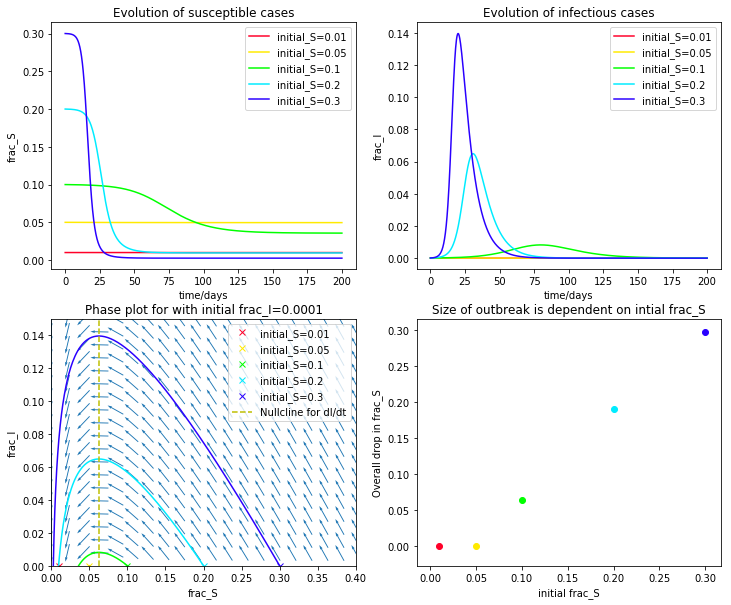

In [181]:
# plt.cm.CMRmap[0]
fig=plt.figure(figsize=[12,10]);
# fig.set_size_inches([,10])
# help(fig)

ax=plt.subplot(2,2,3);
ax2=plt.subplot(2,2,2);
ax1=plt.subplot(2,2,1);
ax4=plt.subplot(2,2,4);
cm = plt.get_cmap('gist_rainbow')
for i in range(siz):
    s0=runs[i];
    col=cm(1.*i/(siz));
    lbl='initial_S='+str(fss[i])
    xs=s0.Ns[:,0];
    ys=s0.Ns[:,1];
    ts=s0.ts[:];
    
#     xs=s0.Ns[-10000:,0];
#     ys=s0.Ns[-10000:,1];
#     ts=s0.ts[-10000:];
    ax.plot(xs,ys,color=col);    
    ax.plot(s0.Ns[0,0],s0.Ns[0,1],'x',color=col,label=lbl);
#     ax.quiver(s0.Ns[50,0],s0.Ns[50,1],s0.Ns[50,0]-s0.Ns[50,0],s0.Ns[50,1]-s0.Ns[50,1],color=col,pivot='mid')

    ax2.plot(ts,ys,color=col,label=lbl);
    ax1.plot(ts,xs,color=col,label=lbl);
    
    ax4.scatter(fss[i],s0.Ns[0,0]-s0.Ns[-1,0],color=col);
#     col =  
#     s0.phase(ax,(0,1))
ax.set_xlabel(s0.labels[0]);
ax.set_ylabel(s0.labels[1]); 
ax.plot([1./params[1],1./params[1]],[0,1],'--y',label='Nullcline for dI/dt')
ax.set_title('Phase plot for with initial frac_I='+str(fi))
ax.legend()
ax.set_ylim(0,0.15)
ax.set_xlim(0,0.4)
vfunc=lambda x,y:fNdot((x,y,1-x-y),0,s0.params)[0:2];
vfield(ax,vfunc,20,2/0.5,'len')

ax1.set_ylabel(s0.labels[0]);
ax1.legend()
ax1.set_xlabel(s0.labels[-1]);
ax1.set_title('Evolution of susceptible cases')

ax2.set_ylabel(s0.labels[1]);
ax2.legend()
# ax2.set_ylim([0 ,0.1])
ax2.set_xlabel(s0.labels[-1]);
ax2.set_title('Evolution of infectious cases')

ax4.set_ylabel('Overall drop in frac_S');
ax4.legend()
ax4.set_xlabel('initial frac_S');
ax4.set_title('Size of outbreak is dependent on intial frac_S')

# fig.savefig('task2_q7.png')


/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel/__main__.py:37: RuntimeWarning: divide by zero encountered in double_scalars
/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel/__main__.py:46: RuntimeWarning: invalid value encountered in divide
/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel/__main__.py:47: RuntimeWarning: invalid value encountered in divide


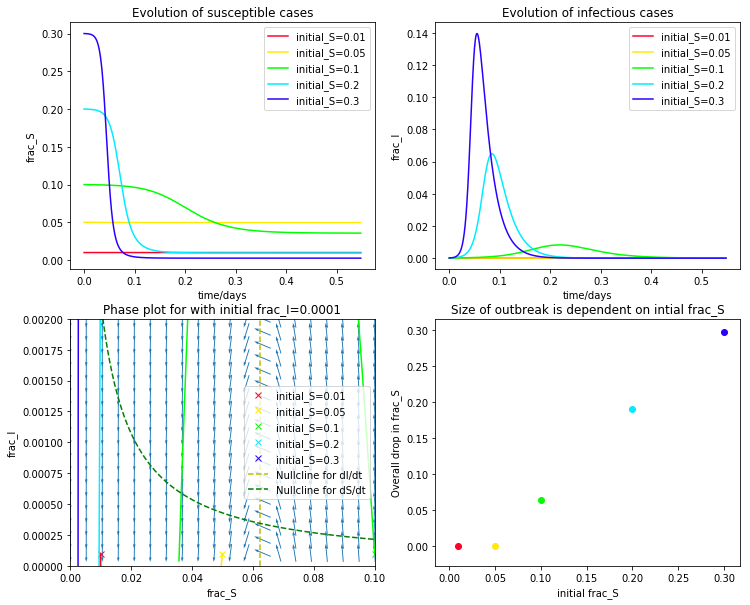

/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel/__main__.py:75: RuntimeWarning: divide by zero encountered in double_scalars


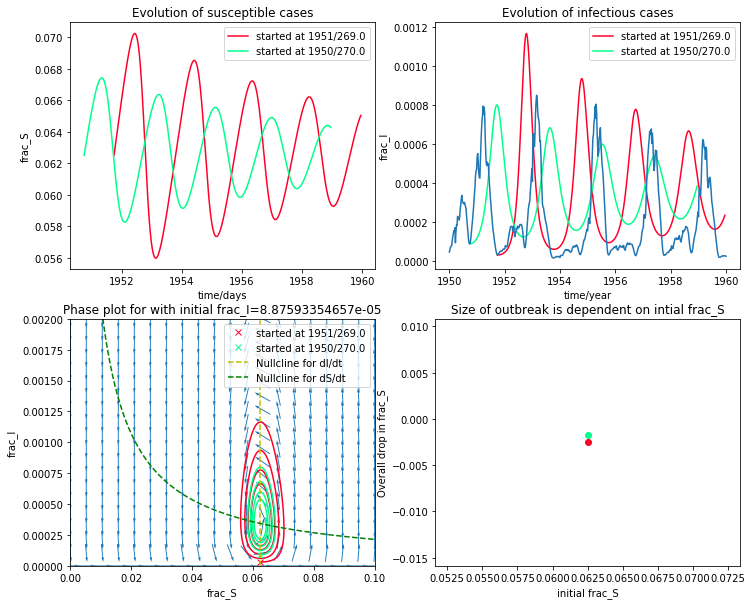

In [213]:
def fNdot(N,t,params):
#     tr=T, r0=r0;
    (s,i,r)=N;
    T,r0,k=params;
    ds=0.      -r0*s*i/T+k;
    di=r0*s*i/T-i/T;
    dr=i/T-k;
    return (ds,di,dr)

params=(8.0, 16.0, 4.29E-5);
# params=(8.0, 16.0, 4.29E-4);

T,r0,k=params;

# fi=0.0001;
fis=[];
fis+=[min(Is[:1000])];
fis+=[min(Is[250:500])];
ids=list(Is.index(x) for x in fis);
t_sts=list( time_days[x] for x in ids);
# fss=[0.01,0.05,0.15,0.20, 0.25 ,0.30,1-fi];
# fss=[ 1/r0];
fss=[ 1/r0]*len(fis);
siz=max(len(fss),len(fis))


N0=[(.199,fi,0.800),('frac_S','frac_I','frac_R','time/days')];
s0=intobj(fNdot,N0,params);
runs=[];

for i in range(siz):
    fi=fis[i];fs=fss[i];t_st=t_sts[i];
    fr=1-fs-fi;
    s=copy.copy(s0);
    s.ss=(fs,fi,fr);
    s.evo(np.linspace(t_st,t_st+3000,3001))
    runs+=[s];
# s.Ns[-10,1]

# plt.cm.CMRmap[0]
fig=plt.figure(figsize=[12,10]);
# fig.set_size_inches([,10])
# help(fig)

ax=plt.subplot(2,2,3);
ax2=plt.subplot(2,2,2);
ax1=plt.subplot(2,2,1);
ax4=plt.subplot(2,2,4);
cm = plt.get_cmap('gist_rainbow')
for i in range(siz):
    s0=runs[i];
    col=cm(1.*i/(siz));
    xs=s0.Ns[:,0];
    ys=s0.Ns[:,1];
    ts=s0.ts[:];
    ts=list(x/365. for x in ts);
    lbl='started at '+str(int(ts[0]))+'/'+str(round((ts[0]%1)*365));
#     xs=s0.Ns[-10000:,0];
#     ys=s0.Ns[-10000:,1];
#     ts=s0.ts[-10000:];
    ax.plot(xs,ys,color=col);    
    ax.plot(s0.Ns[0,0],s0.Ns[0,1],'x',color=col,label=lbl);
#     ax.quiver(s0.Ns[50,0],s0.Ns[50,1],s0.Ns[50,0]-s0.Ns[50,0],s0.Ns[50,1]-s0.Ns[50,1],color=col,pivot='mid')

    ax2.plot(ts,ys,color=col,label=lbl);
    ax1.plot(ts,xs,color=col,label=lbl);
    
    ax4.scatter(fss[i],s0.Ns[0,0]-s0.Ns[-1,0],color=col);
#     col =  
#     s0.phase(ax,(0,1))
ax.set_xlabel(s0.labels[0]);
ax.set_ylabel(s0.labels[1]); 

xs=np.linspace(0,0.1,500);
ys=[T*k/r0/x for x in xs];
ax.plot([1./params[1],1./params[1]],[0,1],'--y',label='Nullcline for dI/dt')
ax.plot(xs,ys,'--g',label='Nullcline for dS/dt')
ax.set_title('Phase plot for with initial frac_I='+str(fi))
ax.legend()
ax.set_ylim(0,0.002)
ax.set_xlim(0,0.1)
vfunc=lambda x,y:fNdot((x,y,1-x-y),0,s0.params)[0:2];
vfield(ax,vfunc,20,2/0.5,'len')

ax1.set_ylabel(s0.labels[0]);
ax1.legend()
ax1.set_xlabel(s0.labels[-1]);
ax1.set_title('Evolution of susceptible cases')

ax2.set_ylabel(s0.labels[1]);
ax2.legend()
# ax2.set_ylim([0 ,0.1])
ax2.set_xlabel(s0.labels[-1]);
ax2.set_title('Evolution of infectious cases')
ax2.plot(time_years,Is);
# ax.set_title ('Fraction of England and Wales population infected with Measles over 10 years')
ax2.set_xlabel('time/year')
ax2.set_ylabel('frac_I')

ax4.set_ylabel('Overall drop in frac_S');
ax4.legend()
ax4.set_xlabel('initial frac_S');
ax4.set_title('Size of outbreak is dependent on intial frac_S')

# fig.savefig('task2_q7.png')


In [208]:
fss

[0.0625]

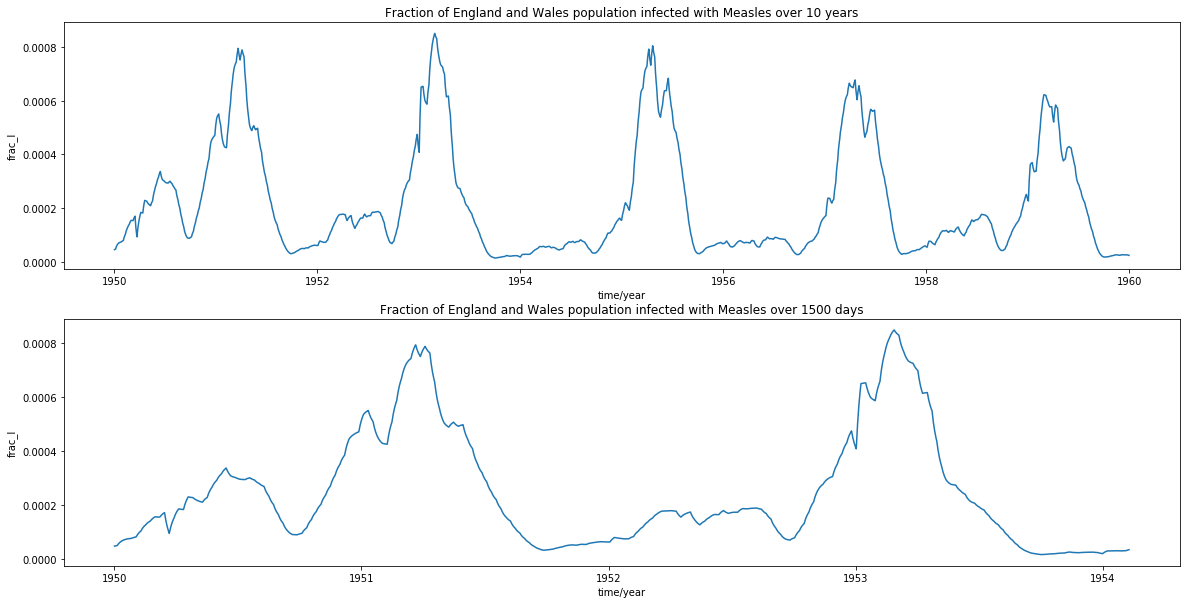

In [187]:
time_years=csvdata['time'];
time_days=[round(x*365) for x in csvdata['time']];
# print(time)
# len(set(time))
# len(time)
infection=csvdata['infection'];
Is=[x/y for x,y in zip(infection,pop)];
fig=plt.figure(figsize=[20,10]);
ax=plt.subplot(2,1,1);
ax2=plt.subplot(2,1,2);
# ax.plot(time_years,Is);
ax.plot(time_years,Is);
ax.set_title ('Fraction of England and Wales population infected with Measles over 10 years')
ax.set_xlabel('time/year')
ax.set_ylabel('frac_I')

ax2.plot(time_years[0:1500],Is[0:1500]);
ax2.set_title ('Fraction of England and Wales population infected with Measles over 1500 days')
ax2.set_xlabel('time/year')
ax2.set_ylabel('frac_I')


In [48]:
from IPython.display import HTML
tog='''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''';
HTML(tog)

{'Ns': array([[  3.00000000e-01,   5.00000000e-02,   6.50000000e-01],
        [  2.96986263e-01,   5.24166086e-02,   6.50597128e-01],
        [  2.93858750e-01,   5.49162785e-02,   6.51224972e-01],
        ..., 
        [  3.32871156e-02,   3.57774779e-05,   9.66677107e-01],
        [  3.33297780e-02,   3.55693073e-05,   9.66634653e-01],
        [  3.33724414e-02,   3.53626480e-05,   9.66592196e-01]]),
 'fcn': <function __main__.fNdot>,
 'labels': ('frac_S', 'frac_I', 'frac_R', 'time/days'),
 'params': (8.0, 16.0, 0.000429),
 'ss': (0.3, 0.05, 0.6499999999999999),
 'ts': array([   0. ,    0.1,    0.2, ...,   99.8,   99.9,  100. ])}

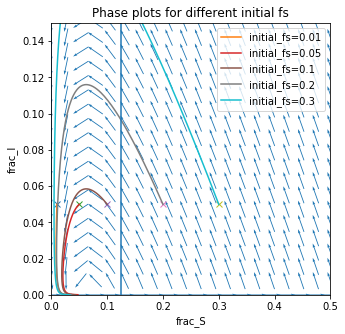

In [49]:
fig=plt.figure(figsize=[5,5]);

ax=plt.subplot(1,1,1);
   
for i in range(siz):
    fr=1-fss[i]-fi;
    s0.ss=(fss[i],fi,fr);
    s0.evo(np.linspace(0,100,1001))
    ax.plot(fss[i],fi,'x');    
    ax.plot(s0.Ns[:,0],s0.Ns[:,1],label='initial_fs='+str(fss[i]));
        
#     s0.phase(ax,(0,1))
    ax.set_xlabel(s0.labels[0]);
    ax.set_ylabel(s0.labels[1]); 
    ax.set_title('Phase plots for different initial fs');
    ax.legend()
    
    ax.set_ylim(0,0.15)
    ax.set_xlim(0,0.5)
ax.plot([0.125,0.125],[0, 0.2])
# params=(5.,8.0)
vfunc=lambda x,y:fNdot((x,y,1-x-y),0,s0.params)[0:2];
vfield(ax,vfunc,20,2/0.5,'len')
fig.savefig('task2_q8.png')
s0.__dict__
